In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.linalg import inv


In [2]:
data=pd.read_csv('abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
#corrolation between variables
corr=data.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Text(0.5, 1.0, 'Viscera weight and Diameter features of abalone dataset')

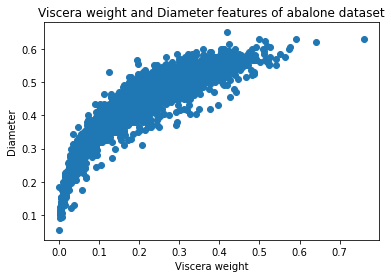

In [4]:
#nonlinear correlation
plt.scatter(data['Viscera weight'],data['Diameter'])
plt.xlabel('Viscera weight')
plt.ylabel('Diameter')
plt.title('Viscera weight and Diameter features of abalone dataset')

Text(0.5, 1.0, 'Length and Height features of abalone dataset')

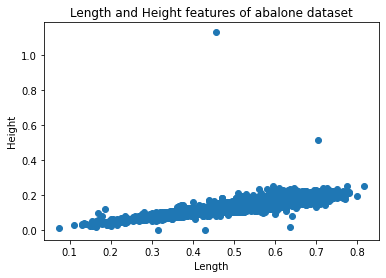

In [5]:
#linear correlation
plt.scatter(data['Length'],data['Height'])
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Length and Height features of abalone dataset')

In [6]:
X=data['Length']
Y=data['Height']


In [7]:
X=data['Length']
Y=data['Height']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)


In [8]:
X_train.shape

(3132,)

In [9]:
class LinearLeastSquare:
    def __init__(self):
        pass

#train

    def fit(self,X,Y):
        #w=slope
        #w=(X.T X)^-1*X.T Y
        #values=np.array
        X=X.values.reshape(-1,1)
        Y=Y.values.reshape(-1,1)
        self.w=np.matmul(inv(np.matmul(X.T,X)),np.matmul(X.T,Y))

    def predict(self,x):
        height_pred=x*self.w
        return height_pred
    
    #L1 loss=MAE=Mean Absolute Error
    #L2 Loss=MSE=Mean Square Error

    def evaluate(self,X,Y,loss='MAE'):
        X=X.values.reshape(-1,1)
        Y=Y.values.reshape(-1,1)
        Y_pred=[]
        for i in range(X.shape[0]):
            y_pred=self.predict(X[i])
            Y_pred.append(y_pred)
        Y_pred=np.array(Y_pred)  

        Error=Y-Y_pred
        MAE=np.mean(np.abs(Error))
        MSE=np.mean(Error**2) 

        if loss=='MAE':
            print('MAE :')
            return MAE
            
        elif loss=='MSE':
            print('MSE :')
            return MSE  

        elif loss=='Huber':
            delta=1.0
            print('Huber loss :')
            
            return np.mean(np.where(MAE<=delta,np.mean(MSE/2),np.mean((delta*MAE-(delta**2/2)))))

        elif loss=='Hinge':
            print('Hinge loss :')  
            new_predicted=np.array([-1 if i==0 else i for i in Y_pred]) 
            new_actual = np.array([-1 if i==0 else i for i in Y]) 
            return np.mean([max(0, 1-x*y) for x, y in zip(new_actual, new_predicted)])


        
        


In [10]:
lls=LinearLeastSquare()
lls.fit(X_train,Y_train)


In [11]:
lls.w


array([[0.2674188]])

In [12]:
Y_pred=X_train*lls.w[0,0]

In [13]:
lls.predict(0.7)

array([[0.18719316]])

In [14]:
Y_pred=X_train*lls.w[0,0]

Text(0, 0.5, 'Height')

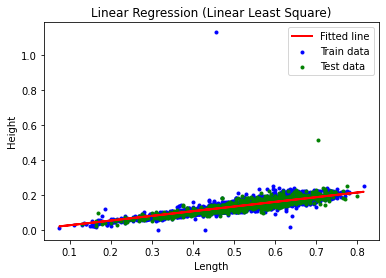

In [15]:
plt.scatter(X_train,Y_train,c='b',marker='.',label='Train data')
plt.scatter(X_test,Y_test,c='g',marker='.',label='Test data')
plt.plot(X_train,Y_pred,lw=2,c='red',label='Fitted line')
plt.title('Linear Regression (Linear Least Square)')
plt.legend()    
plt.xlabel('Length')
plt.ylabel('Height')


In [16]:
lls.evaluate(X_test,Y_test)

MAE :


0.03975515334678691

In [17]:
lls.evaluate(X_test,Y_test,loss='MSE')

MSE :


0.002568614664134845

In [18]:
lls.evaluate(X_test,Y_test,loss='Huber')

Huber loss :


0.0012843073320674225

In [19]:
lls.evaluate(X_test,Y_test,loss='Hinge')

Hinge loss :


0.9792882478792198